Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату 
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
Произвести расчет как с использованием intercept, так и без.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

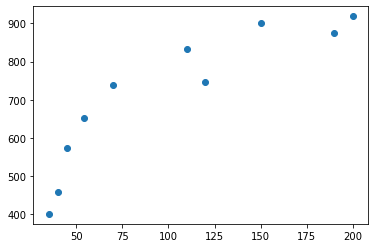

In [3]:
plt.scatter(zp, ks)
plt.show()

In [4]:
b = (len(zp)*np.sum(zp*ks) - np.sum(zp)*np.sum(ks))/(len(zp)*np.sum(zp**2) - np.sum(zp)**2) #Первая формула
b

2.6205388824027653

In [5]:
b = (np.mean(zp*ks) - np.mean(zp)*np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2) #Вторая формула
b

2.620538882402765

In [6]:
a = np.mean(ks) - b*np.mean(zp)
a

444.1773573243596

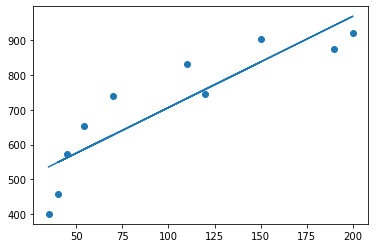

In [7]:
#intercept
plt.scatter(zp, ks)
plt.plot()
plt.plot(zp, a + b * zp)
plt.show()

In [8]:
#without intercept
# С помощью матричного способа
import seaborn as sns

In [9]:
zp = zp.reshape(len(zp), 1)
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [10]:
ks = ks.reshape(len(ks), 1)
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [11]:
b = np.dot(np.linalg.inv(np.dot(zp.T, zp)),zp.T@ks)
b

array([[5.88982042]])

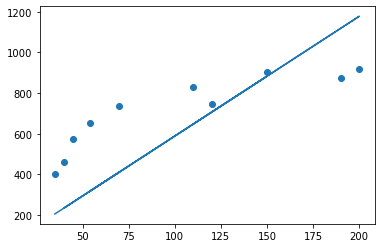

In [12]:
#intercept
plt.scatter(zp, ks)
plt.plot()
plt.plot(zp, b * zp)
plt.show()

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [19]:
b1 = 0.1

def mse_(b1, ks=ks, zp=zp, n=10):
    return (np.sum((b1*zp - ks)**2)/n)

alpha = 1e-6
n = 10
for i in range(3000):
    b1 -=alpha*(2/n)*np.sum((b1*zp - ks)*zp)
    if i%500==0:
        print('interation: {i}, b1 = {b1}, mse = {mse}'.format(i=i, b1=b1, mse = mse_(b1)))


interation: 0, b1 = 0.25952808, mse = 493237.7212546963
interation: 500, b1 = 5.889815595583751, mse = 56516.858416040064
interation: 1000, b1 = 5.8898204201285544, mse = 56516.85841571941
interation: 1500, b1 = 5.889820420132673, mse = 56516.85841571943
interation: 2000, b1 = 5.889820420132673, mse = 56516.85841571943
interation: 2500, b1 = 5.889820420132673, mse = 56516.85841571943


*3. Произвести вычисления как в пункте 2, но с вычислением intercept. 
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [26]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

zp = zp.reshape(len(zp), 1)
ks = ks.reshape(len(ks), 1)
zp = np.hstack([np.ones((10,1)), zp])
b = np.dot(np.linalg.inv(np.dot(zp.T, zp)),zp.T@ks)
b

array([[444.17735732],
       [  2.62053888]])

In [37]:
b1_x = 0.1
b2_x = 0.1
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

def mse_(b1, b2, ks=ks, zp=zp, n=10):
    return (np.sum((b1*zp + b2 - ks)**2)/n)

alpha = 1e-6
n = 10
for i in range(3500001):
    b1-= alpha*(2/n)*np.sum((b1*zp + b2 - ks)*zp)
    b2-= alpha*(2/n)*np.sum(b1*zp + b2 - ks)
    if i%500000==0:
        print('interation: {i}, b1 = {b1},  b2 = {b2}, mse = {mse}'.format(i=i, b1=b1, b2=b2, mse = mse_(b1, b2)))

interation: 0, b1 = 2.3020650088043455,  b2 = 487.4456648749044, mse = 6945.312059547103
interation: 500000, b1 = 2.373415229425429,  b2 = 477.7519237376801, mse = 6756.358354326573
interation: 1000000, b1 = 2.428780295832429,  b2 = 470.2299480924339, mse = 6642.586084623443
interation: 1500000, b1 = 2.4717414885455584,  b2 = 464.3931801401785, mse = 6574.0818478941965
interation: 2000000, b1 = 2.5050777454874678,  b2 = 459.86406947358347, mse = 6532.8342709394365
interation: 2500000, b1 = 2.530945417139744,  b2 = 456.3496512890684, mse = 6507.998396753186
interation: 3000000, b1 = 2.5510177497318516,  b2 = 453.622596004944, mse = 6493.044290545327
interation: 3500000, b1 = 2.566593118906898,  b2 = 451.5065044836377, mse = 6484.0401664788205


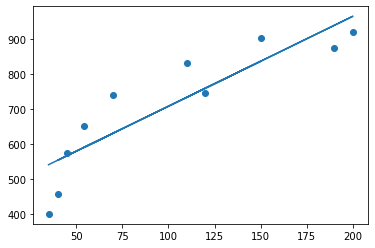

In [38]:
#intercept
plt.scatter(zp, ks)
plt.plot()
plt.plot(zp, b2 + b1 * zp)
plt.show()